In [1]:
import nb_setup 
import importlib
importlib.reload(nb_setup)
nb_setup.init()

Added project root to sys.path: /Users/falcon/Developments/act/backtesting-playground/trading
Changed current working directory to: /Users/falcon/Developments/act/backtesting-playground/trading
Initialized project with base directory: /Users/falcon/Developments/act/backtesting-playground/trading


In [2]:
from constants.coin_names import CoinNames
from settings import DATA_DIR
import pandas as pd

In [3]:
df = pd.read_csv(DATA_DIR / "all.csv", index_col=[0, 1])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164217 entries, BTC to LDO
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   start_time                      164217 non-null  object 
 1   end_time                        164217 non-null  object 
 2   interval                        164217 non-null  object 
 3   number_of_trades                164217 non-null  int64  
 4   close                           164217 non-null  float64
 5   high                            164217 non-null  float64
 6   low                             164217 non-null  float64
 7   open                            164217 non-null  float64
 8   volume                          164217 non-null  float64
 9   tic                             164217 non-null  int64  
 10  toc                             164217 non-null  int64  
 11  pct_change                      164160 non-null  float64
 12  accumulated_pct_change

In [4]:
df.head()

,start_time,end_time,interval,number_of_trades,close,high,low,open,volume,tic,toc,pct_change,accumulated_pct_change,rolling_accumulated_pct_change
symbol,,,,,,,,,,,,,,
BTC,2024-02-10 00:00:00,2024-02-10-00:14:59,15m,1258,47244.0,47278.0,47160.0,47166.0,24.81303,1707523200000,1707524099999,NaN,NaN,NaN
BTC,2024-02-10 00:15:00,2024-02-10-00:29:59,15m,1099,47204.0,47283.0,47186.0,47244.0,23.62129,1707524100000,1707524999999,-0.084667,-0.084667,-0.084667
BTC,2024-02-10 00:30:00,2024-02-10-00:44:59,15m,1429,47147.0,47232.0,47077.0,47204.0,39.37283,1707525000000,1707525899999,-0.120752,-0.205317,-0.205317
BTC,2024-02-10 00:45:00,2024-02-10-00:59:59,15m,1048,47116.0,47153.0,47079.0,47146.0,28.94293,1707525900000,1707526799999,-0.065752,-0.270934,-0.270934
BTC,2024-02-10 01:00:00,2024-02-10-01:14:59,15m,993,47110.0,47158.0,47082.0,47122.0,28.31493,1707526800000,1707527699999,-0.012735,-0.283634,-0.283634


/var/folders/xf/2lw3fnvj1td1jv2kmmzt3zw00000gn/T/ipykernel_85169/2380185806.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


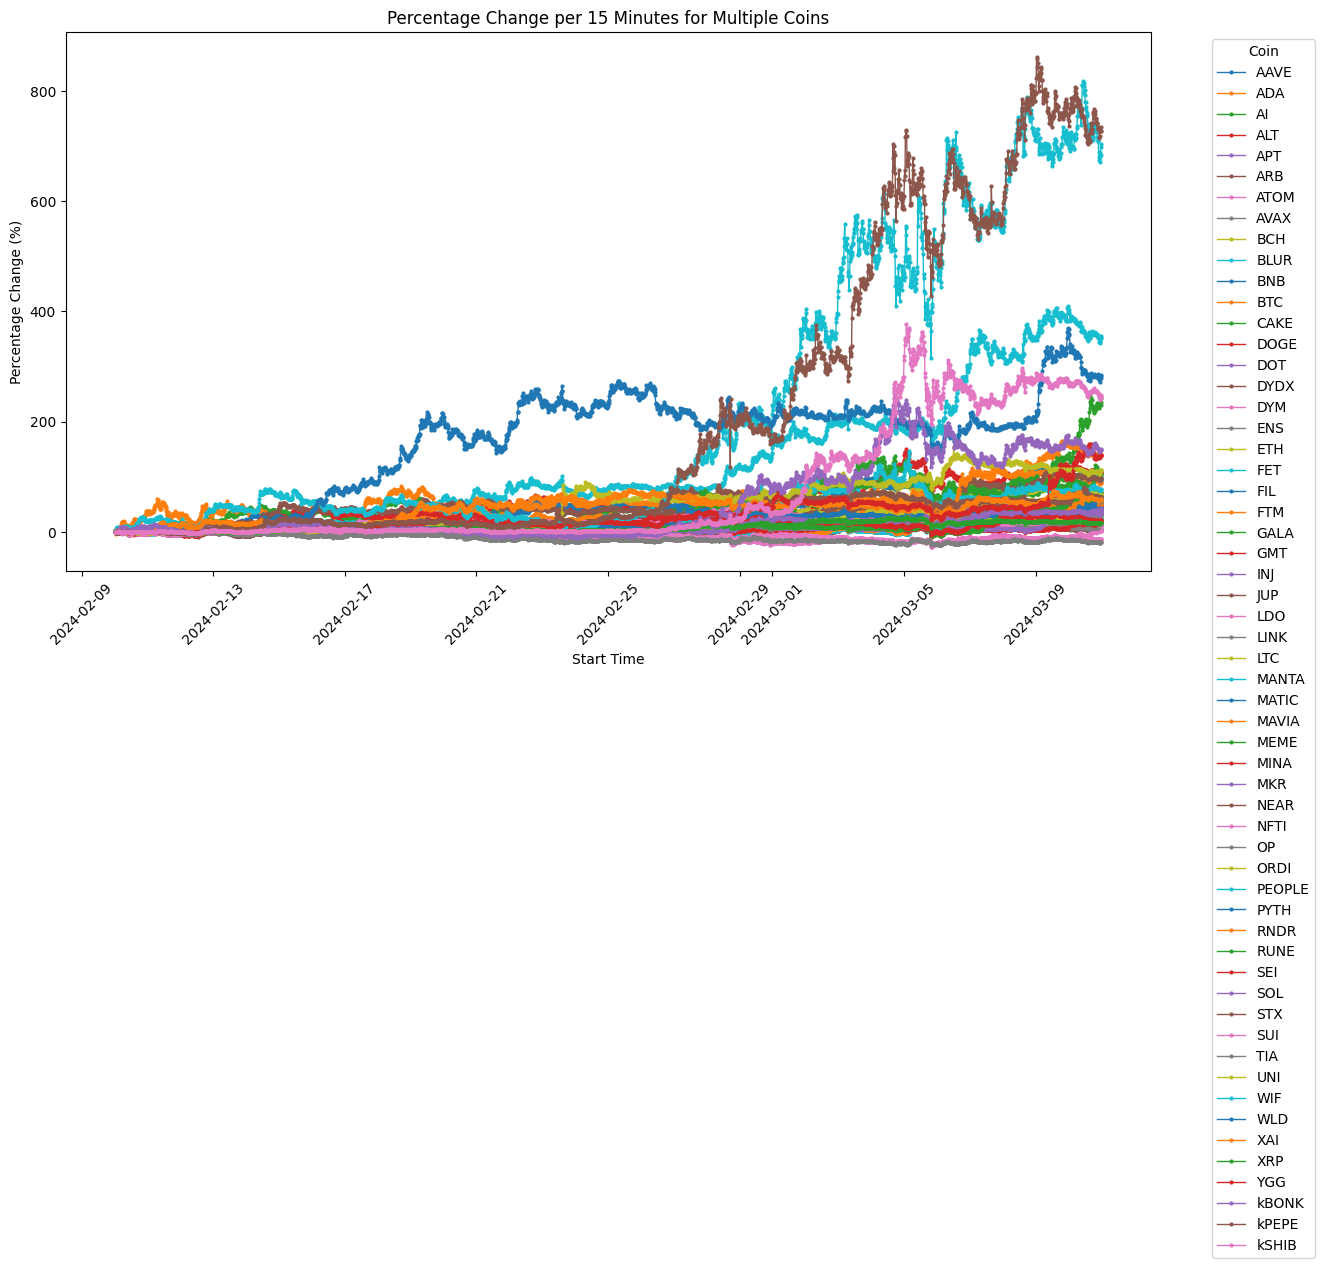

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Assuming df is your DataFrame and it includes a 'timestamp' level or column for plotting on the x-axis
# First, ensure your data is sorted by the timestamp if it's not already


def plt1(
    df,
    chart=100000000,
    title="Percentage Change per 15 Minutes for Multiple Coins",
    xlabel="Start Time",
    ylabel="Percentage Change (%)",
    column="accumulated_pct_change",
):

    # Ensure 'start_time' is a datetime column if it's not part of the MultiIndex
    if "start_time" not in df.index.names:
        df["start_time"] = pd.to_datetime(df["start_time"])

    # Plotting
    plt.figure(figsize=(14, 7))

    # Assuming 'coin' is the first level of the MultiIndex
    for coin, group_df in df.groupby(level=0):
        plt.plot(
            group_df["start_time"][:chart],
            group_df[column][:chart],
            marker="o",
            linestyle="-",
            markersize=2,
            linewidth=1,
            label=coin,
        )

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title="Coin", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plt1(df)

In [6]:
_df = df

_df.groupby(level=0)['accumulated_pct_change'].describe()
# _df['abs_pct_change'] = _df['pct_change'].abs()
_df.groupby(level=0)['accumulated_pct_change'].max().sort_values(ascending=False)



symbol
kPEPE     862.634146
WIF       818.009995
FET       410.724895
kSHIB     376.858628
WLD       369.405770
kBONK     260.413136
GALA      248.759408
RNDR      164.738060
YGG       159.183989
UNI       153.791724
DOGE      149.779746
PEOPLE    147.531063
MEME      138.238668
FIL       115.005375
NEAR      114.420011
FTM       114.025080
BCH       106.398341
AI         95.621192
STX        85.460642
MAVIA      82.531589
XAI        76.689054
ALT        74.595257
RUNE       68.677205
BNB        65.693926
CAKE       64.732866
PYTH       63.988350
ETH        60.275895
APT        59.027026
GMT        58.702042
JUP        56.707080
AAVE       55.462328
ORDI       53.734513
DOT        51.510972
DYDX       51.112822
BTC        48.086530
ADA        46.476236
SEI        44.882749
MATIC      44.635288
ENS        43.668717
ATOM       43.030303
MKR        42.565037
NFTI       42.232456
SOL        41.326768
OP         39.259323
LTC        33.549243
MANTA      32.982992
INJ        30.885203
BLUR  

/var/folders/xf/2lw3fnvj1td1jv2kmmzt3zw00000gn/T/ipykernel_85169/2380185806.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


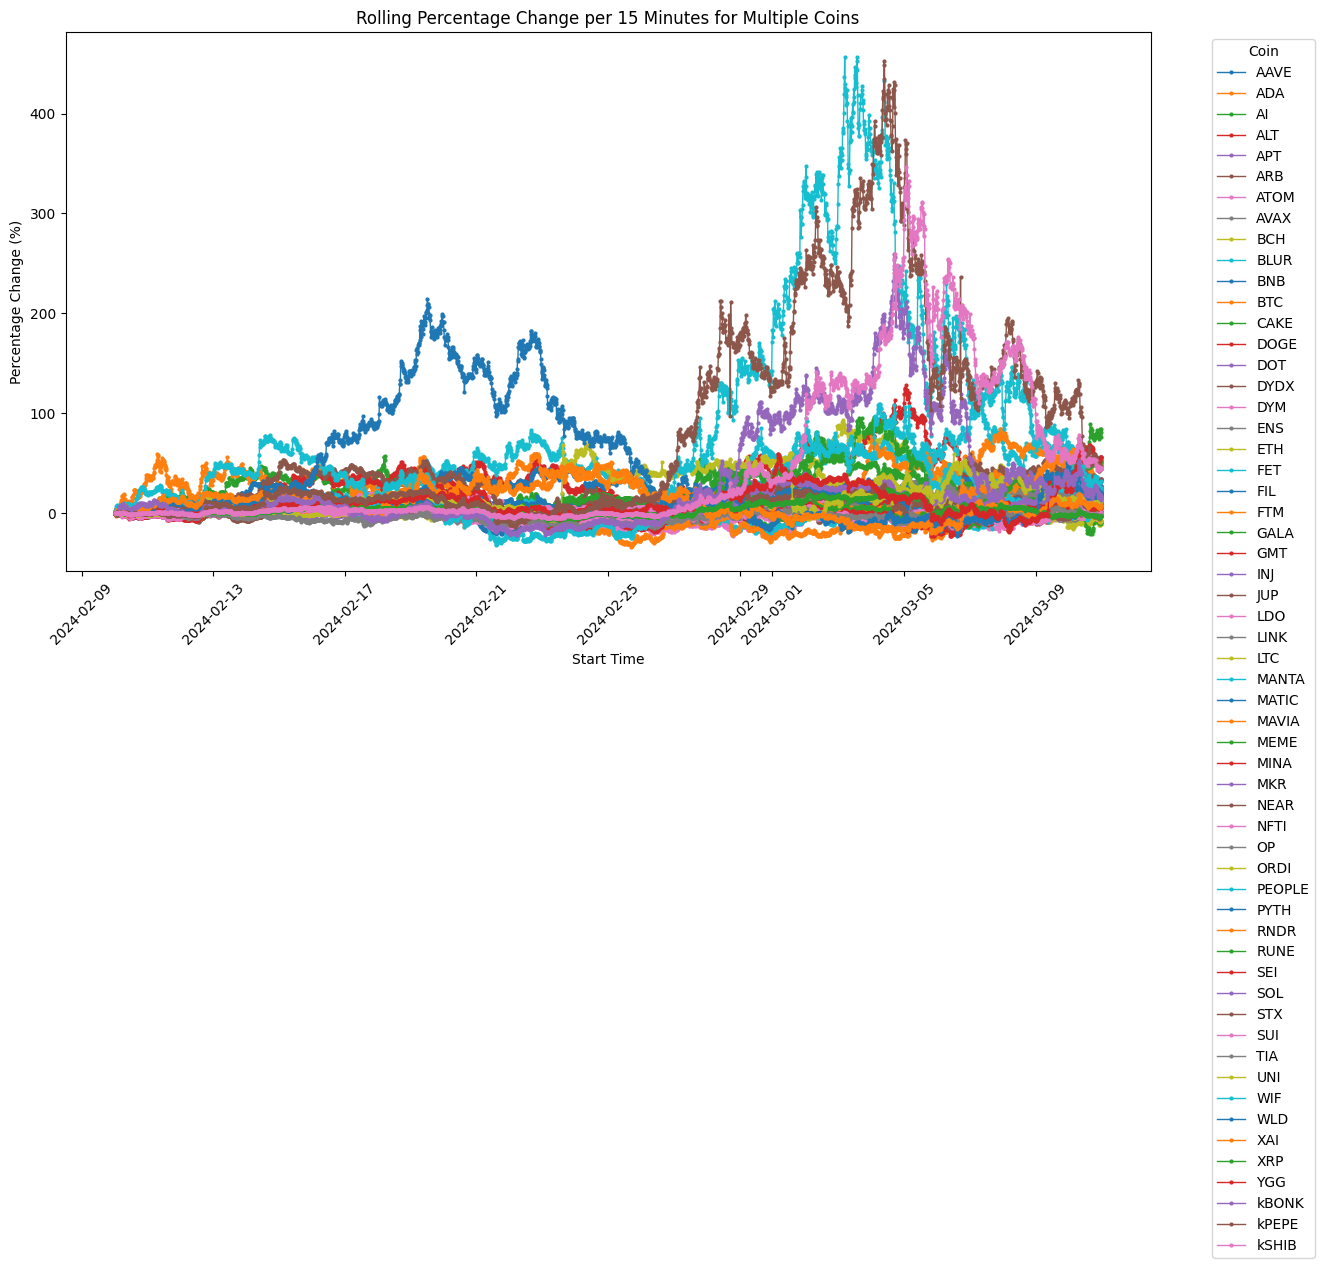

In [7]:
plt1(df=df, column="rolling_accumulated_pct_change", title="Rolling Percentage Change per 15 Minutes for Multiple Coins")


In [8]:
_df = df

_df.groupby(level=0)['rolling_accumulated_pct_change'].describe()
# _df['abs_pct_change'] = _df['pct_change'].abs()
# _df.groupby(level=0)['rolling_accumulated_pct_change'].max().sort_values(ascending=False)

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAVE,2880.0,8.212992,6.790347,-4.953882,2.872328,6.591224,13.520993,27.084515
ADA,2880.0,7.759632,9.454701,-9.400590,-0.193175,6.278340,13.763903,38.765217
AI,2880.0,12.102273,15.038453,-17.387062,-0.250514,10.821037,23.077479,57.643293
ALT,2880.0,10.680372,15.047576,-20.386966,-0.885019,9.347566,19.634002,53.267405
APT,2880.0,9.238431,11.853920,-13.035481,-0.108411,7.072103,15.405919,45.109780
ARB,2880.0,1.261655,6.994843,-16.005812,-3.178062,1.864817,7.115209,16.975971
ATOM,2880.0,6.614054,7.911291,-6.835975,0.129160,3.751638,14.425318,27.229342
AVAX,2880.0,2.797846,8.246509,-13.866228,-2.170254,2.547233,8.362978,22.733045
BCH,2880.0,15.477120,23.130649,-15.666190,-1.502223,8.509415,20.083080,93.153651


In [9]:
############ Rolling Variance and Standard Deviation ############
window_size = 7 * 24 * 4  # Adjust this based on your exact data frequency

# Assuming 'pct_change' has already been calculated and is in your DataFrame
df['rolling_variance_pct_change'] = df.groupby(level=0)['pct_change'].transform(
    lambda x: x.rolling(window=window_size, min_periods=1).var()
)

df['rolling_std_pct_change'] = df.groupby(level=0)['pct_change'].transform(
    lambda x: x.rolling(window=window_size, min_periods=1).std()
)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164217 entries, BTC to LDO
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   start_time                      164217 non-null  datetime64[ns]
 1   end_time                        164217 non-null  object        
 2   interval                        164217 non-null  object        
 3   number_of_trades                164217 non-null  int64         
 4   close                           164217 non-null  float64       
 5   high                            164217 non-null  float64       
 6   low                             164217 non-null  float64       
 7   open                            164217 non-null  float64       
 8   volume                          164217 non-null  float64       
 9   tic                             164217 non-null  int64         
 10  toc                             164217 non-null  int64        

In [11]:
df.head()

,start_time,end_time,interval,number_of_trades,close,high,low,open,volume,tic,toc,pct_change,accumulated_pct_change,rolling_accumulated_pct_change,rolling_variance_pct_change,rolling_std_pct_change
symbol,,,,,,,,,,,,,,,,
BTC,2024-02-10 00:00:00,2024-02-10-00:14:59,15m,1258,47244.0,47278.0,47160.0,47166.0,24.81303,1707523200000,1707524099999,NaN,NaN,NaN,NaN,NaN
BTC,2024-02-10 00:15:00,2024-02-10-00:29:59,15m,1099,47204.0,47283.0,47186.0,47244.0,23.62129,1707524100000,1707524999999,-0.084667,-0.084667,-0.084667,NaN,NaN
BTC,2024-02-10 00:30:00,2024-02-10-00:44:59,15m,1429,47147.0,47232.0,47077.0,47204.0,39.37283,1707525000000,1707525899999,-0.120752,-0.205317,-0.205317,0.000651,0.025516
BTC,2024-02-10 00:45:00,2024-02-10-00:59:59,15m,1048,47116.0,47153.0,47079.0,47146.0,28.94293,1707525900000,1707526799999,-0.065752,-0.270934,-0.270934,0.000781,0.027943
BTC,2024-02-10 01:00:00,2024-02-10-01:14:59,15m,993,47110.0,47158.0,47082.0,47122.0,28.31493,1707526800000,1707527699999,-0.012735,-0.283634,-0.283634,0.002028,0.045035


In [12]:
def rank_column(df, column, ascending=False):

    # Step 1: Set 'start_time' as part of the index if it's not already
    if not isinstance(df.index, pd.MultiIndex) or 'start_time' not in df.index.names or 'coin' not in df.index.names:
        # If 'coin' is not a column, create it from the index
        if 'coin' not in df.columns:
            df['coin'] = df.index
        # Reset index if necessary and set 'start_time' and 'coin' as the index
        if 'start_time' not in df.index.names:
            df = df.reset_index()
        df = df.set_index(['start_time', 'coin'])

    # Step 2: Pivot the DataFrame
    # df_pivoted = df.pivot_table(values='rolling_accumulated_pct_change', index='start_time', columns='coin')
    df_pivoted = df.pivot_table(values=column, index='start_time', columns='coin')

    # Step 3: Rank the pivoted DataFrame
    df_ranked = df_pivoted.rank(axis=1, ascending=ascending)

    # Step 4: Melt the DataFrame back to long format
    df_ranked_melted = df_ranked.reset_index().melt(id_vars=['start_time'], var_name='coin', value_name=f'rank_{column}')

    # Merge the rank back to the original DataFrame
    df_final = pd.merge(df.reset_index(), df_ranked_melted, left_on=['start_time', 'symbol'], right_on=['start_time', 'coin'], how='left')
    df_final.drop(columns=['coin_x', "coin_y"], inplace=True)
    df_final.set_index(["symbol"], inplace=True)
    return df_final

df_final = rank_column(df, 'rolling_accumulated_pct_change', ascending=False)
df_final = rank_column(df_final, 'rolling_variance_pct_change', ascending=True)
df_final['average_rank'] = df_final[['rank_rolling_accumulated_pct_change', 'rank_rolling_variance_pct_change']].mean(axis=1)



In [13]:
df_final = df_final[["start_time", "average_rank", "rank_rolling_accumulated_pct_change", "rank_rolling_variance_pct_change", "open", "close"]]

In [14]:
df_final.head()

,start_time,average_rank,rank_rolling_accumulated_pct_change,rank_rolling_variance_pct_change,open,close
symbol,,,,,,
BTC,2024-02-10 00:00:00,NaN,NaN,NaN,47166.0,47244.0
BTC,2024-02-10 00:15:00,46.0,46.0,NaN,47244.0,47204.0
BTC,2024-02-10 00:30:00,23.0,42.0,4.0,47204.0,47147.0
BTC,2024-02-10 00:45:00,18.0,34.0,2.0,47146.0,47116.0
BTC,2024-02-10 01:00:00,13.0,24.0,2.0,47122.0,47110.0


In [15]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 164217 entries, BTC to LDO
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   start_time                           164217 non-null  datetime64[ns]
 1   average_rank                         164160 non-null  float64       
 2   rank_rolling_accumulated_pct_change  164160 non-null  float64       
 3   rank_rolling_variance_pct_change     164103 non-null  float64       
 4   open                                 164217 non-null  float64       
 5   close                                164217 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 8.8+ MB


In [16]:
df_final.to_csv(DATA_DIR / "all_ranked.csv", index=True)

In [17]:
import plotly.express as px

def interactive_plt(df):
    # Assuming df_final is your DataFrame and it has a 'symbol' column to identify each coin
    # If your DataFrame uses symbols as the index, you might first reset the index:
    df_plot = df_final.reset_index()

    fig = px.line(df_plot, x='start_time', y='average_rank', color='symbol', title='Average Rank Over Time by Coin',
                labels={'start_time': 'Time', 'average_rank': 'Average Rank'}, hover_name='symbol')
    fig.update_layout(xaxis_title='Time', yaxis_title='Average Rank', legend_title='Symbol')
    fig.update_xaxes(tickangle=45)
    fig.show()

interactive_plt(df_final)

ModuleNotFoundError: No module named 'plotly'

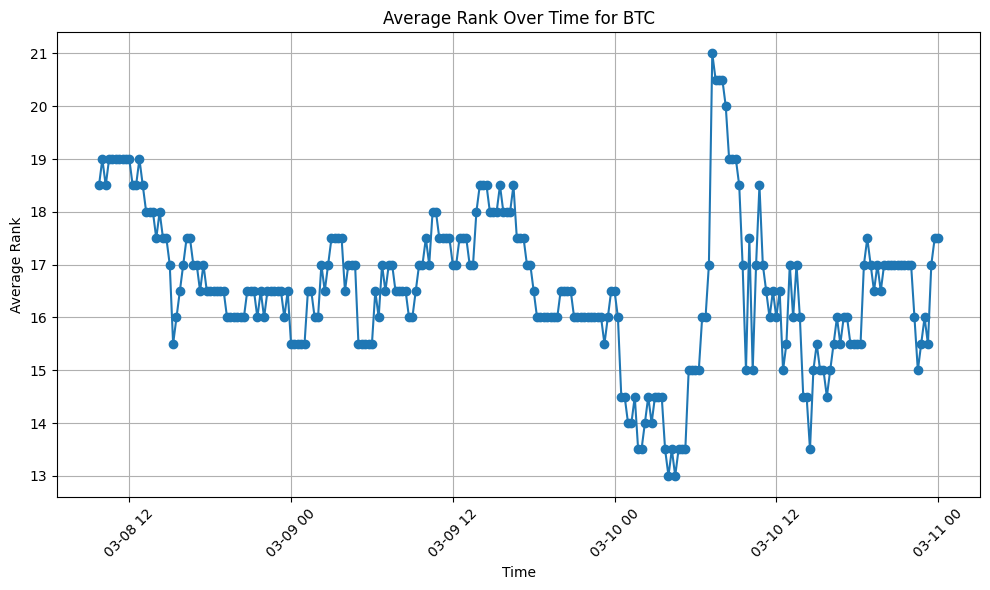

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


def plt_single_coin(df, coin):
    # Assuming df_final is your DataFrame

    # Filter the DataFrame for a specific symbol, e.g., 'BTC'

    btc_data = df.loc[coin]
    # btc_data = df_final.loc['WLD']

    # Ensure the data is sorted by start_time just in case
    btc_data = btc_data.sort_values('start_time')

    # Plotting
    chart=250
    plt.figure(figsize=(10, 6))
    plt.plot(btc_data['start_time'][-chart:], btc_data['average_rank'][-chart:], marker='o', linestyle='-')
    plt.title('Average Rank Over Time for BTC')
    plt.xlabel('Time')
    plt.ylabel('Average Rank')
    plt.xticks(rotation=45) # Rotate date labels for better readability
    plt.grid(True)
    plt.tight_layout() # Adjust layout to not cut off labels
    plt.show()

plt_single_coin(df_final, CoinNames.BTC.value)


In [19]:
def get_rank_data(df):
    df_final = df
    # Ensure start_time is a datetime type for sorting
    df_final['start_time'] = pd.to_datetime(df_final['start_time'])

    # Sort by start_time to ensure chronological order
    df_final = df_final.sort_values(by='start_time')

    # Get unique timestamps
    unique_times = df_final['start_time'].unique()

    # Initialize a dictionary to hold the rank data
    rank_data = {timestamp: {} for timestamp in unique_times}

    # Iterate over each timestamp
    for timestamp in unique_times:
        # Filter the DataFrame for the current timestamp
        df_snapshot = df_final[df_final['start_time'] == timestamp]
        
        # Iterate over each row in the snapshot to extract symbol and rank
        for index, row in df_snapshot.iterrows():
            symbol = index
            rank = row['average_rank']
            # Store the rank in the dictionary
            rank_data[timestamp][symbol] = rank

    return rank_data

rank_data = get_rank_data(df_final)

In [20]:
import pandas as pd

# Assuming you have already prepared the rank_data dictionary as previously described

# Convert timestamps to a sorted list for sequential access
timestamps = sorted(rank_data.keys())

# Function to display rank data for a given timestamp
def display_rank_data_for_timestamp(timestamp):
    data_for_timestamp = rank_data[timestamp]
    df_for_timestamp = pd.DataFrame(list(data_for_timestamp.items()), columns=['Symbol', 'Average Rank'])
    df_for_timestamp = df_for_timestamp.sort_values(by='Average Rank')[:10]  # Sort by rank for readability
    print(f"Data for {timestamp}:")
    print(df_for_timestamp)

# Interactive loop to display data frame by frame
for timestamp in timestamps:
    input("Press Enter to display the next set of data...")  # Wait for user to press Enter
    display_rank_data_for_timestamp(timestamp)

Data for 2024-02-10 00:00:00:
  Symbol  Average Rank
0    BTC           NaN
1    DOT           NaN
2   RNDR           NaN
3   PYTH           NaN
4    SOL           NaN
5  MANTA           NaN
6   NEAR           NaN
7    SUI           NaN
8   MINA           NaN
9    WLD           NaN
Data for 2024-02-10 00:15:00:
   Symbol  Average Rank
29    WIF           1.0
30   MINA           2.0
0   MAVIA           3.0
50   AVAX           4.0
14    ENS           5.0
33   BLUR           6.0
49    TIA           7.0
2     ALT           8.0
21    INJ           9.0
40  MATIC          10.0
Data for 2024-02-10 00:30:00:
    Symbol  Average Rank
26    DYDX           4.0
10  PEOPLE           7.5
43     ADA           8.0
6      YGG           9.0
24     TIA           9.5
7     RUNE           9.5
47   kPEPE          11.5
8      FET          12.0
1     NFTI          15.0
49     SUI          16.0
Data for 2024-02-10 00:45:00:
   Symbol  Average Rank
6    RUNE           6.0
38   NFTI          10.0
26    SUI       

KeyboardInterrupt: Interrupted by user